In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# import pulsee.plot as vis

import tomography.operators as op
from tomography.global_constants import DPI_SAVE, DPI_DISPLAY

from tomography.tomography_helper_functions import multiply_error_matrix, tr_error, fortunato_error

from tomography.plot_dm import plot_complex_density_matrix

plt.rcParams['figure.dpi'] = DPI_DISPLAY
plt.rcParams['font.family'] = ['Helvetica']
# matplotlib.rcParams['svg.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
CNOT = op.CNOT

In [3]:
FILE_TYPE = "pdf"
LABEL_SIZE = 16

# Making the Bar Plot

## First need to organize the data into a dictionary

In [4]:
fn_1000 = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_1000_ns1_11.pickle"
fn_1000_CNOT = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_1000CNP_ns1_67.pickle"
fn_0100 = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0100_ns1_25.pickle"
fn_0100_CNOT = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0100CNP_ns1_81.pickle"
fn_0010 = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0010_ns1_39.pickle"
fn_0010_CNOT = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0010CNP_ns1_95.pickle"
fn_0001 = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0001_ns1_53.pickle"
fn_0001_CNOT = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0001CNP_ns1_109.pickle"

state_fns = [fn_1000, fn_1000_CNOT, fn_0100, fn_0100_CNOT, fn_0010, fn_0010_CNOT, fn_0001, fn_0001_CNOT]

### Getting Projections and their uncertainties

In [5]:
import qutip as qt
qt.__version__

'5.1.1'

In [6]:
qt.qobj

<module 'qutip.core.qobj' from 'C:\\Users\\lemon\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\cnot-4ROsunUI-py3.11\\Lib\\site-packages\\qutip\\core\\qobj.py'>

In [7]:
# import qutip.qobj

rhos = []
rhos_err = []
projections = []

for fn in state_fns:
    with open(f"{fn}", "rb") as result_file:
        print(fn)
        data = pickle.load(result_file)
        rhos.append(data[0])
        projections.append(data[1])
        
    with open(f"{fn[:-7]}_error.pickle", "rb") as error_file:
        rhos_err.append(pickle.load(error_file))
        
projections = np.array(projections)
projections

C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_1000_ns1_11.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_1000CNP_ns1_67.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0100_ns1_25.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0100CNP_ns1_81.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0010_ns1_39.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0010CNP_ns1_95.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\inputs\result_0001_ns1_53.pickle
C:\Users\lemon\OneDrive - Brown University\CNOT project\MIT\2025_02_19\CNP\result_0001CNP_ns1_109.pickle


array([0.99559591, 0.98100056, 0.98800397, 0.97827277, 0.9908414 ,
       0.9721467 , 0.9951079 , 0.8594044 ])

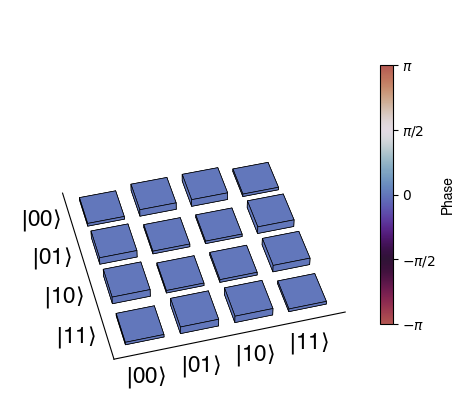

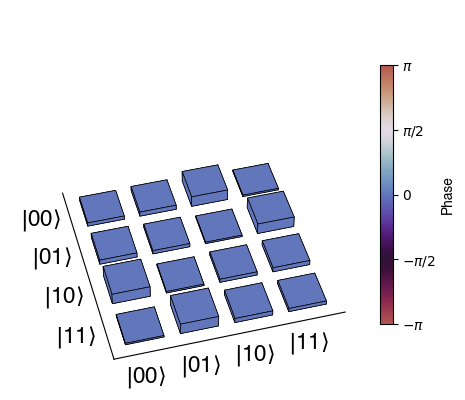

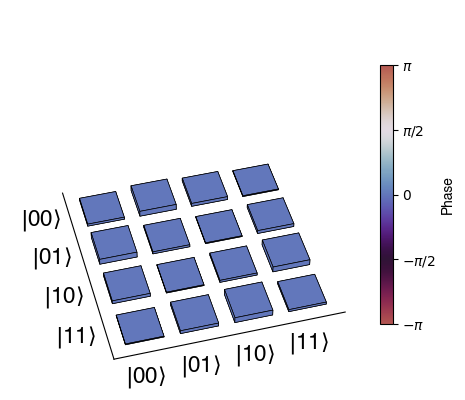

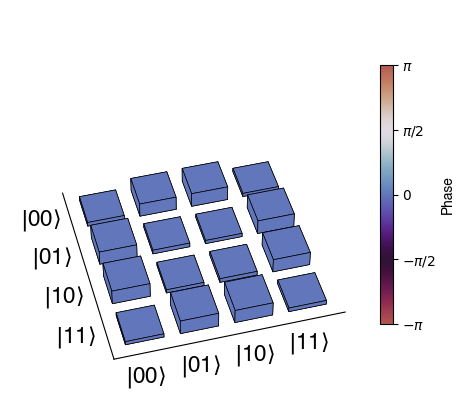

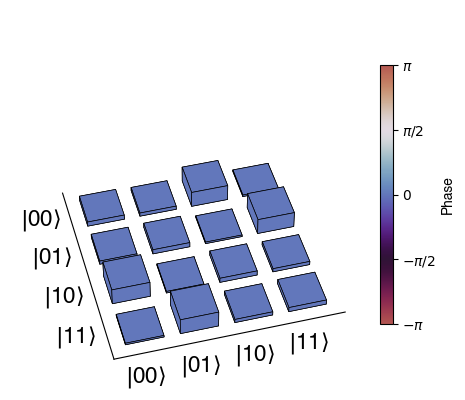

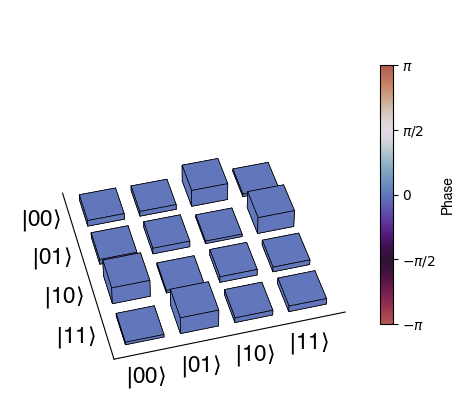

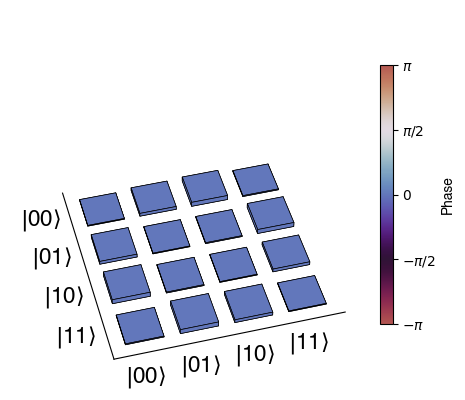

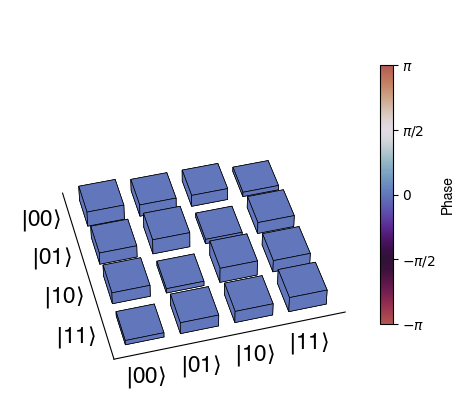

In [8]:
for r in rhos_err:
    plot_complex_density_matrix(r)

In [9]:
projections_err = []
rhos_perfect = [op.CLEAN_1000, op.CLEAN_1000, op.CLEAN_0100, op.CLEAN_0100,
                op.CLEAN_0010, op.CLEAN_0001, op.CLEAN_0001, op.CLEAN_0010]

for rho, rho_err, rho_theo in zip(rhos, rhos_err, rhos_perfect):
    # display(rho)
    # display(rho_err)
    # display(rho_theo)
    projections_err.append(fortunato_error(rho, rho_err, rho_theo, rho_theo * 0))
    
projections_err = np.array(projections_err).real
projections_err

array([0.027522  , 0.03344662, 0.02070407, 0.04019771, 0.04279318,
       0.06342917, 0.00719403, 0.17271644])

### Getting Correlations and their Uncertainties:
- Assuming rho_theo has 0 error


In [10]:
rho_theos = [op.CLEAN_1000, op.CLEAN_0100, op.CLEAN_0001, op.CLEAN_0010]

correlations = []
for i in range(0, len(projections), 2):
    rho_in, rho_out = rhos[i], rhos[i+1]
    rho_theo = op.CNOT_Phased * rho_in * op.CNOT_Phased.dag()
    # rho_theo = rho_theos[i//2]
    c = (rho_theo * rho_out).tr() / np.sqrt((rho_theo ** 2).tr() * (rho_in ** 2).tr())
    correlations.append(c)
    
correlations = np.array(correlations).real
print(correlations)
print(np.average(correlations))

[0.95030375 0.94455427 0.86620357 0.65344947]
0.8536277653223613


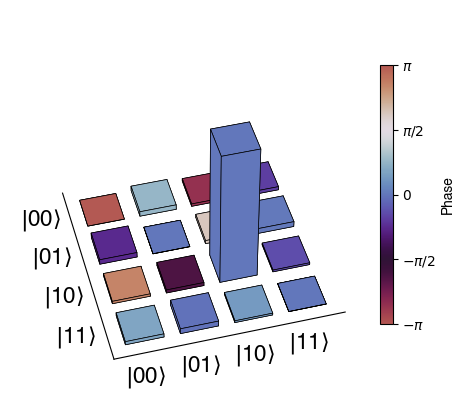

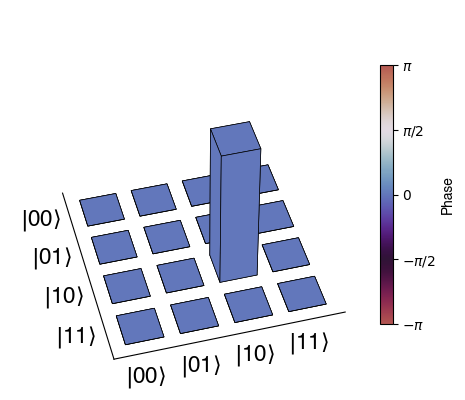

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [11]:
plot_complex_density_matrix(rho_theo)
plot_complex_density_matrix(rho_theos[i//2])

- Old:
[0.89393234 0.87506214 0.70383837 0.81608762]
0.8222301193731727

- With theo:
[0.89641732 0.88533016 0.6994019  0.84126248]
0.8306029639070764

In [12]:
correlations_err = []
for i in range(0, len(projections), 2):
    rho_in, rho_out = rhos[i], rhos[i+1]
    rho_in_err, rho_out_err = rhos_err[i], rhos_err[i + 1]
    rho_theo = op.CNOT_Phased * rho_in * op.CNOT_Phased.dag()
    # rho_theo = rho_theos[i//2]
    
    numer = (rho_theo * rho_out).tr()
    denom = np.sqrt((rho_theo ** 2).tr() * (rho_in ** 2).tr())
    c = numer / denom
    
    err_numer = tr_error(multiply_error_matrix(rho_theo, rho_theo * 0, rho_out, rho_out_err))
    err_denom_0 = (rho_theo ** 2).tr() * tr_error(multiply_error_matrix(rho_in, rho_in_err, rho_in, rho_in_err))
    err_denom = err_denom_0 * 1/2 / np.sqrt(denom)

    err_c = c * np.sqrt((err_numer / numer) ** 2 + (err_denom / denom) ** 2)
    correlations_err.append(err_c)
    
correlations_err = np.array(correlations_err).real
correlations_err

array([0.03056126, 0.03445653, 0.0519629 , 0.11694524])

In [13]:
all_data = {
    "Input Fidelity": projections[::2], # even elements
    "Output Fidelity": projections[1::2], # odd elements
    "Attenuated Correlation": correlations
}
all_data

{'Input Fidelity': array([0.99559591, 0.98800397, 0.9908414 , 0.9951079 ]),
 'Output Fidelity': array([0.98100056, 0.97827277, 0.9721467 , 0.8594044 ]),
 'Attenuated Correlation': array([0.95030375, 0.94455427, 0.86620357, 0.65344947])}

### Calculating fidelity and its uncertainty:

In [14]:
fidelity = np.mean(correlations)
fidelity_err = np.sqrt(np.sum(correlations_err ** 2)) / len(correlations)

assert np.isclose(fidelity_err.imag, 0)
fidelity_err = fidelity_err.real
display(fidelity, fidelity_err)

0.8536277653223613

0.034001448552055315

## Choosing the color of the bars

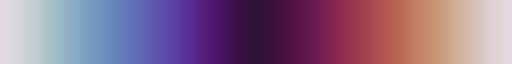

In [15]:
cmap = matplotlib.colormaps.get_cmap('twilight')
display(cmap)
color_offset = 0.1
# colors = [cmap(color_offset + i/3) for i in range(3)]
colors = [cmap(0.15), cmap(0.3), cmap(0.7)]

## Plotting:

In [16]:
for x, y in all_data.items():
    print(x, y)

Input Fidelity [0.99559591 0.98800397 0.9908414  0.9951079 ]
Output Fidelity [0.98100056 0.97827277 0.9721467  0.8594044 ]
Attenuated Correlation [0.95030375 0.94455427 0.86620357 0.65344947]


In [17]:
fig_width = 6
fig_height = 5.5
fig_height

5.5

[0. 1. 2. 3.]
[0.2 1.2 2.2 3.2]
[0.4 1.4 2.4 3.4]


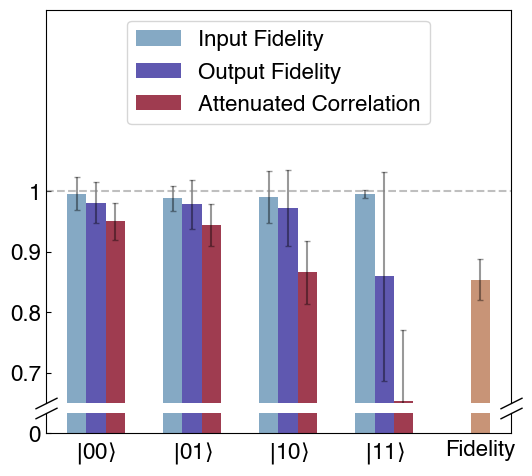

In [18]:
# code adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html and
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

""" SET UP: """

# Making a broken y-axis such that we can skip the 'boring' part of the plot: (0 ~ 0.8)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[20, 1])
fig.subplots_adjust(hspace=0.05) # adjust space between axes
# ax2.set_xlabel("States", fontsize=LABEL_SIZE)
# ax1.set_title(" ", y=1.2)
# ax.set_title("Results for full set of input & output states", fontsize=14)

# plot bars on the two axes
# input_states = [r"$|00\rangle$", r"$|01\rangle$", r"$|10\rangle$", r"$|11\rangle$"]
input_states = [r"$|$00$\rangle$", r"$|$01$\rangle$", r"$|$10$\rangle$", r"$|$11$\rangle$"]
xs = np.arange(len(input_states))
width = 0.2
index = 0

errors_all = np.concatenate((projections_err[::2], projections_err[1::2], correlations_err))
x_err_pos = []
y_err_pos = []
ERROR_BAR_COLOR = 'black'
ERROR_ALPHA = 0.4

""" PLOTTING: """

# the main 12 bars:
for attribute, measurement in all_data.items():
    offset = width * index
    ax1.bar(xs + offset, measurement, width, label=attribute, color=colors[index])
    ax2.bar(xs + offset, measurement, width, label=attribute, color=colors[index])
    x_err_pos.append(xs + offset)
    y_err_pos.append(measurement)
    index += 1
    print(xs+offset)
    
# error on the 12 bars:
# In the order of [in_proj_1, in_proj2, in_proj_3, in_proj_4, out_proj_1, out_proj_2, out_proj_3, out_proj_4, corr_1, ...] 
x_err_pos = np.array(x_err_pos).flatten()
y_err_pos = np.array(y_err_pos).flatten()
ax1.errorbar(x_err_pos, y_err_pos, fmt='none', yerr=errors_all, capsize=2, color=ERROR_BAR_COLOR, alpha=ERROR_ALPHA)
    
    
# plot the fidelity bar
fidelity_color = cmap(0.85)
fidelity_xpos = xs[-1] + 1.2
offset_fidelity = width * index
ax1.bar(fidelity_xpos, fidelity, width, color=fidelity_color)
ax2.bar(fidelity_xpos, fidelity, width, color=fidelity_color)
# fidelity error bar
ax1.errorbar(fidelity_xpos, fidelity, fmt='none', yerr=fidelity_err, capsize=2, color=ERROR_BAR_COLOR, alpha=ERROR_ALPHA)



ax1.set_ylim(0.65, 1.3)  # change this to change the proportion of the bar heights
ax2.set_ylim(0, 0.1)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(bottom=False)
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=LABEL_SIZE,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


ax1.tick_params('y', direction='in')
ax1.set_yticks([0.7, 0.8, 0.9, 1], [0.7, 0.8, 0.9, 1], fontsize=LABEL_SIZE)


xticks_pos = list(xs + width) + [fidelity_xpos]
# print(xticks_pos)
ax2.tick_params('x', length=0, pad=5)
ax2.set_xticks(xticks_pos, input_states + ["Fidelity"], fontsize=LABEL_SIZE)
ax2.tick_params('y', direction='in')
ax2.set_yticks([0], [0], fontsize=LABEL_SIZE)

ax1.legend(loc='upper center', fontsize=LABEL_SIZE)

# Draw a horizontal line across y=1
ax1.axhline(1, linestyle='--', color='gray', alpha=0.5)
plt.savefig(f"result_bar_plot_6_by_5p5.{FILE_TYPE}", transparent=True, dpi=DPI_SAVE, bbox_inches = 'tight')

In [19]:
# for rho in rhos:
#     vis.plot_complex_density_matrix(rho, label_qubit=True, label_size=LABEL_SIZE, fig_dpi=DPI_SAVE, show_legend=False)

# Making the Density Matrix Plots

Helper `wrapper` function to save DMs in a consistent format

In [20]:
def dm_savefig_wrapper(dm, name, file_type=FILE_TYPE, show_phase=False):
    fig_dm, ax_dm = plot_complex_density_matrix(dm, label_qubit=True, label_size=LABEL_SIZE, fig_dpi=DPI_SAVE,
                                                show_legend=show_phase, show=False,
                                                hide_z_axis=False, show_grid=True)
    fig_dm.savefig(f"{name}.{file_type}", transparent=True, dpi=DPI_SAVE, bbox_inches='tight')


## Measured & Theoretical of 4 inputs & outputs.

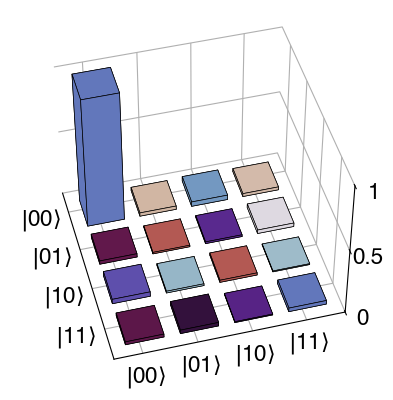

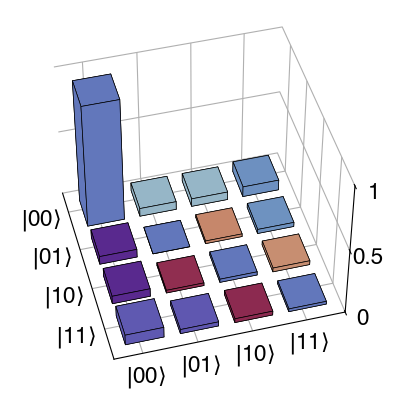

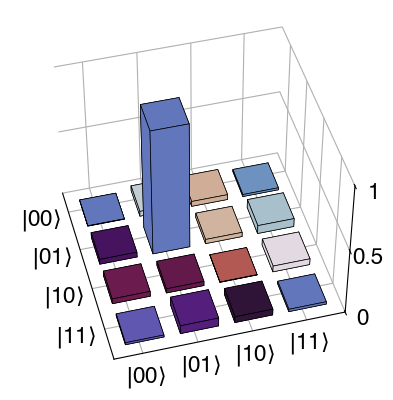

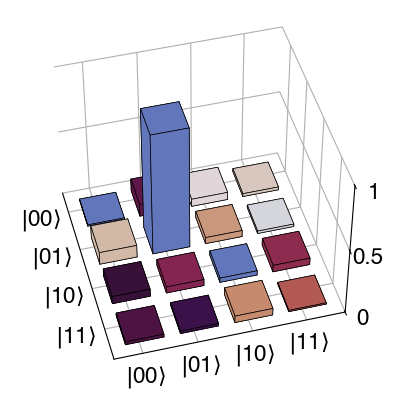

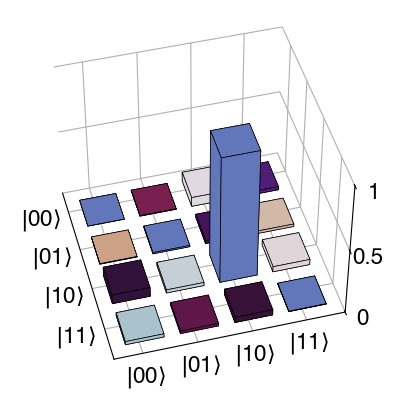

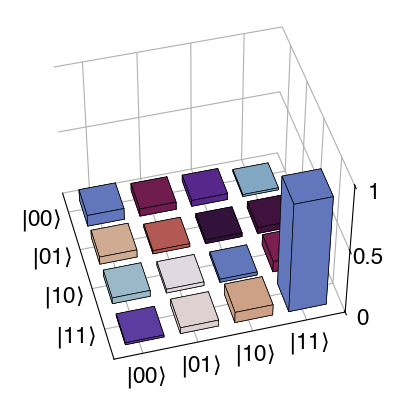

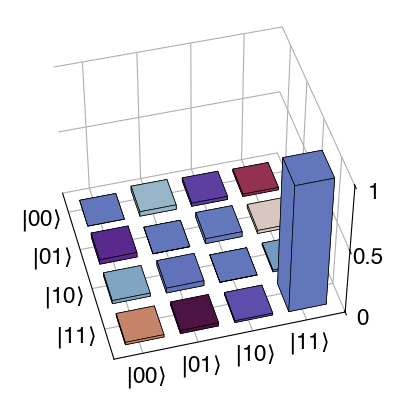

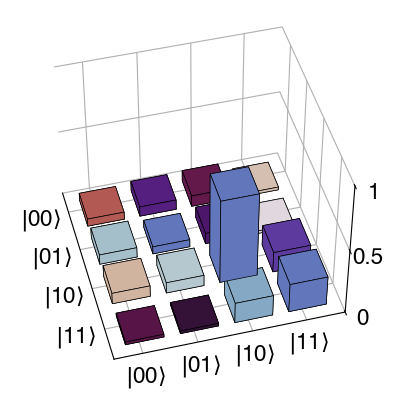

In [21]:
rhos_names = ["1000_meas", "1000_CNP_meas", "0100_meas", "0100_CNP_meas",
              "0010_meas", "0010_CNP_meas", "0001_meas", "0001_CNP_meas"]

for i in range(len(rhos)):
    dm_savefig_wrapper(rhos[i], rhos_names[i], FILE_TYPE)

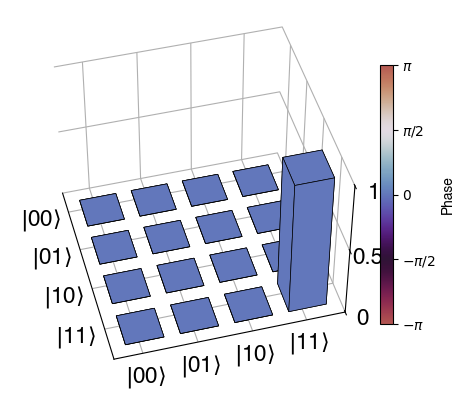

In [22]:
dm_savefig_wrapper(op.CLEAN_0001, "phase_legend", FILE_TYPE, show_phase=True)

# Summarizing everything into a .txt file

In [23]:
projection_names = ["1000 input", "1000 output", "0100 input", "0100 output",
                    "0010 input", "0010 output", "0001 input", "0001 output"]

corr_names = ["1000", "0100", "0010", "0001"]

with open("result_summary.txt", "w") as f:
    f.write("CNOT:\n")
    for i in range(len(projections)):
        f.write(f"Projection {projection_names[i]}: {projections[i]:.3f} error: {projections_err[i]:.3f}\n")
    for i in range(len(correlations)):
        f.write(f"Correlation {corr_names[i]}: {correlations[i]:.3f} error: {correlations_err[i]:.3f}\n")
    f.write("\n")
    f.write(f"CNOT Fidelity: {fidelity:.3f} error: {fidelity_err:.3f}\n")